<a href="https://colab.research.google.com/github/MatheusMataBIO/Projetos-de-ciencias-de-dados-/blob/main/Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
transform = transforms.ToTensor() # Definindo a conversão de imagem para Tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) # Carrega a parte de treino do dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) # Carrega a parte de validação do dataset
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) # Cria um buffer para pegar o dataset por partes

100%|██████████| 9912422/9912422 [00:00<00:00, 84952934.42it/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 25299852.51it/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25318745.89it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9953254.32it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



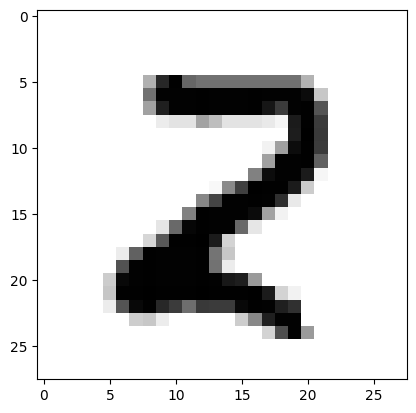

In [ ]:
dataiter = iter(trainloader) # Escolhe uma imagem da base de dados de treinamento
imagens, etiquetas = next(iter(trainloader))
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r'); #Plota a imagem escolhida

In [ ]:
print(imagens[0].shape) # Para verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) # Para verificar as dimensões do tensor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [ ]:
	class Modelo(nn.Module):
   def __init__(self):
      super(Modelo, self).__init__()
      self.linear1 = nn.Linear(28*28, 128) # Camada de entrada, 784 neurôniosque se ligam a 128
      self.linear2 = nn.Linear(128, 64) # Camada interna 1, 128 neurônios que se ligam a 64
      self.linear3 = nn.Linear(64, 10) # Camada interna 2, 64 neurônios que se ligam a 10
      # Para camada de saída não é necessário definir nada pois só precisamos pegar o output da camada interna 2


   def foward(self, X):
       X = F.relu(self.linear1(X)) # Função de ativação de camada de entrada para camada interna 1
       X = F.relu(self.linear2(X)) # Função de ativação da camada interna 1 para camada interna 2
       X = self.linear3(X) # Função de ativação da camada interna 2 para camada de saída, nesse caso f(x) = x
       return F.log_softmax(X, dim=1) # Dados utilizados para calcular a perda


In [ ]:
def treino(modelo, trainloader, device):

    otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5) # Define a política de atualização dos pesos e das bias
    inicio = time() # Timer para sabermos quanto tempo levou o treinamento

    criterio = nn.NLLLoss() # Definindoo critério para calcular a perda
    EPOCHS = 10 # Número de epochs que o algoritmo rodará
    modelo.train() # Ativando o módulo de treinamento do modelo

    for epoch in range(EPOCHS):
      perda_acumulada = 0 # Inicialização da perda acumulada da epoch em questão

      for imagens, etiquetas in trainloader:

        imagens = imagens.view(imagens.shape[0], -1) # Convertendo as imagens para "vetores" de 28*28 casas para ficarem compatíveis
        otimizador.zero_grad() # Zerando os gradientes por conta do ciclo anterior
        output = modelo(imagens.to(device)) # Colocando os dados no modelo
        perda_instantanea.backward() # Back propagation a partir da perda
        otimizador.step() # Atualizando os pesos e as bias
        perda_acumulada +=perda_instantanea.item() # Atualização da perda acumulada

      else:
        print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))
    print("\nTempo de treino (em minutos) =",(time()-inicio)/60)

In [ ]:
def validacao(modelo, valloader, device):
  conta_corretas, conta_todas = 0, 0
  for imagens,etiquetas in valloader:
    for i in range(len(etiquetas)):
      img = imagens[i].view(1, 784)
      # Desativar o autogradpara acelerar a validação. Grafos computacionais dinâmicos tem um custo alto de processamentos
      with torch.no_grad():
        logps = modelo(img.to(device)) # Output do modeloem esacla logaritmica

      ps = torch.exp(logps) # Converte output para escala normal(lembrando que é um tensor)
      probab = list(ps.cpu().numpy()[0])
      etiqueta_pred = probab.index(max(probab)) # Converte o tensor em um número, no caso, o número que o modelo previu correto
      etiqueta_certa = etiquetas.numpy()[i]
      if(etiqueta_certa == etiqueta_pred): # Compara a previsão com o valor correto
        conta_corretas += 1
      contas_toas += 1

    print("Total de imagens testadas =", conta_todas)
    print("\nPrecisão do modelo = {}%".format(conta_corretas*100/conta_todas))



In [ ]:
modelo = Modelo() # Inicializa o modelo

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Modelo rodará na GPU se possível
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)